# Introduction to Neural Networks

In [1]:
import sys
sys.path.append("..")
import numpy as np
import math
import matplotlib.pyplot as plt
from models.nn import NeuralNetwork

# Triangle Network - Showing the power of depth

Text(0.5, 1.0, 'base network')

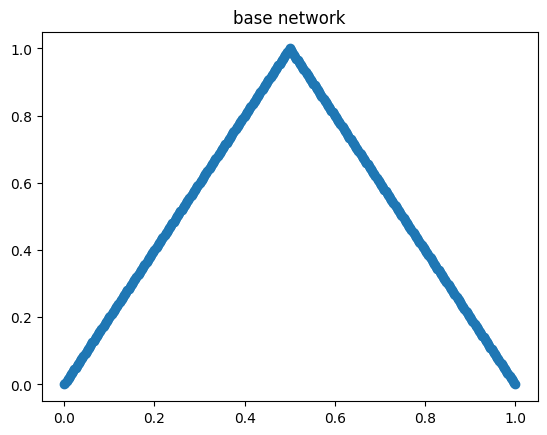

In [15]:
weights = [np.array([[2], [4]]), np.array([1, -1])]
biases = [np.array([0, -2]), np.array([0])]

triangle = NeuralNetwork(layer_sizes=[2], weights=weights, biases=biases)

input = [np.array([i / 400]) for i in range(401)]
output = triangle.predict(input)

plt.scatter(input, output)
plt.title("base network - 1 hidden layer")

Text(0.5, 1.0, '7 hidden layers')

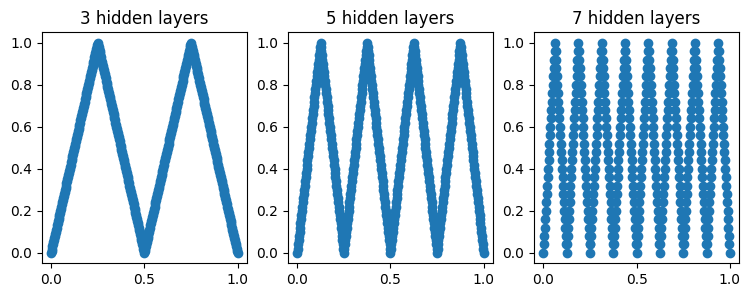

In [18]:
weights2 = weights + weights
biases2 = biases + biases
triangle2 = NeuralNetwork(hidden_layers=3, layer_sizes=[2, 1, 2], weights=weights2, biases=biases2)
output2 = triangle2.predict(input)

weights3 = weights2 + weights
biases3 = biases2+ biases
triangle3 = NeuralNetwork(hidden_layers=5, layer_sizes=[2, 1, 2, 1, 2], weights=weights3, biases=biases3)
output3 = triangle3.predict(input)

weights4 = weights2 + weights2
biases4 = biases2 + biases2
triangle4 = NeuralNetwork(hidden_layers=7, layer_sizes=[2, 1, 2, 1, 2, 1, 2], weights=weights4, biases=biases4)
output4 = triangle4.predict(input)

fig, axes = plt.subplots(ncols = 3, figsize=(9, 3))
axes[0].scatter(input, output2)
axes[0].set_title("3 hidden layers")
axes[1].scatter(input, output3)
axes[1].set_title("5 hidden layers")
axes[2].scatter(input, output4)
axes[2].set_title("7 hidden layers")

# Training a simple Neural Network

## Dataset

$D = \left\{ \begin{array}{c} (0, 1) \\ (1, 0) \\ (2, 1) \end{array} \right\}$

In [50]:
network = NeuralNetwork(layer_sizes=[4])
d_inputs = [np.array([0]), np.array([1]), np.array([2])]
d_outputs = [np.array([1]), np.array([0]), np.array([1])]

In [51]:
predictions_0 = network.predict(d_inputs)

w_rates = [0.5, 0.05]
b_rates = [0.2, 0.05]

network.train(d_inputs, d_outputs, w_rates, b_rates)
predictions_1 = network.predict(d_inputs)

network.train(d_inputs, d_outputs, w_rates, b_rates)
predictions_2 = network.predict(d_inputs)

for i in range(8):
    network.train(d_inputs, d_outputs, w_rates, b_rates)
predictions_10 = network.predict(d_inputs)

for i in range(90):
    network.train(d_inputs, d_outputs, w_rates, b_rates)
predictions_100 = network.predict(d_inputs)

for i in range(400):
    network.train(d_inputs, d_outputs, w_rates, b_rates)
predictions_500 = network.predict(d_inputs)

Text(0.5, 1.0, '500 rounds')

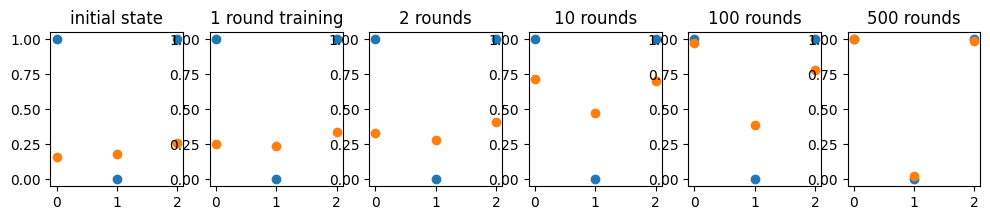

In [52]:
fig, plots = plt.subplots(ncols=6, figsize=(12, 2))

plots[0].scatter(d_inputs, d_outputs)
plots[0].scatter(d_inputs, predictions_0)
plots[0].set_title("initial state")

plots[1].scatter(d_inputs, d_outputs)
plots[1].scatter(d_inputs, predictions_1)
plots[1].set_title("1 round training")

plots[2].scatter(d_inputs, d_outputs)
plots[2].scatter(d_inputs, predictions_2)
plots[2].set_title("2 rounds")

plots[3].scatter(d_inputs, d_outputs)
plots[3].scatter(d_inputs, predictions_10)
plots[3].set_title("10 rounds")

plots[4].scatter(d_inputs, d_outputs)
plots[4].scatter(d_inputs, predictions_100)
plots[4].set_title("100 rounds")

plots[5].scatter(d_inputs, d_outputs)
plots[5].scatter(d_inputs, predictions_500)
plots[5].set_title("500 rounds")

# A More Complex Example

## Dataset

$D = \left\{ \begin{array}{ccc} (-1, 1), 4 & (0, 1), 1 & (1, 1), 4
                             \\ (-1, 0), 1 & (0, 0), 0 & (1, 0), 1
                             \\ (-1, -1), 4 & (0, -1), 1 & (1, -1), 4 \end{array} \right\}$

In [53]:
network2 = NeuralNetwork(input_dim=2, hidden_layers=2, layer_sizes=[10, 4])

d_inputs = [np.array([i, j]) for i in range(-1, 2) for j in range(-1, 2)]
d_outputs = [np.array([(abs(i) + abs(j)) ** 2]) for i in range(-1, 2) for j in range(-1, 2)]

In [54]:
predict_0 = network2.predict(d_inputs)

w_rates = [0.3, 0.2, 0.1]
b_rates = [0.05, 0.03, 0.01]

network2.train(d_inputs, d_outputs, learning_rate_weights=w_rates, learning_rate_biases=b_rates)
predict_1 = network2.predict(d_inputs)

for i in range(9):  
    network2.train(d_inputs, d_outputs, learning_rate_weights=w_rates, learning_rate_biases=b_rates)
predict_10 = network2.predict(d_inputs)

for i in range(90):
    network2.train(d_inputs, d_outputs, learning_rate_weights=w_rates, learning_rate_biases=b_rates)
predict_100 = network2.predict(d_inputs)

for i in range(900):
    network2.train(d_inputs, d_outputs, learning_rate_weights=w_rates, learning_rate_biases=b_rates)
predict_1000 = network2.predict(d_inputs)

In [55]:
def print_outputs(outputs):
    assert len(outputs) == 9
    for i in range(3):
        print(outputs[3 * i], outputs[3 * i + 1], outputs[3 * i + 2])

In [58]:
print("initial")
print_outputs(predict_0)

print("1 round")
print_outputs(predict_1)

print("10 round")
print_outputs(predict_10)

print("100 round")
print_outputs(predict_100)

print("1000 round")
print_outputs(predict_1000)

initial
[0.52549764] [0.45316456] [0.45208994]
[0.20343236] [0.15170408] [0.21424843]
[0.19357474] [0.09863104] [0.19012276]
1 round
[2.33742571] [1.53819908] [1.46013635]
[1.10990099] [0.2924884] [0.50762132]
[0.77451078] [0.17728514] [0.40070259]
10 round
[3.67019433] [1.85268517] [3.71121707]
[2.5879603] [0.65852] [2.56705619]
[2.91635496] [1.1963267] [2.69531659]
100 round
[5.16045137] [2.13746968] [4.53598956]
[2.39509683] [0.03638994] [1.95597444]
[4.40110716] [1.41670803] [3.87717886]
1000 round
[4.00199031] [1.0009206] [4.0015163]
[1.00109924] [0.0001523] [1.00066845]
[4.00108243] [1.00019886] [4.00087128]
